In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [3]:
face_model_path = "./models/res10_300x300_ssd_iter_140000_fp16.caffemodel"
face_proto_path = "./models/deploy.prototxt"

age_model_path = "./models/age_net.caffemodel"
age_proto_path = "./models/age_deploy.prototxt"

gender_model_path = "./models/gender_net.caffemodel"
gender_proto_path = "./models/gender_deploy.prototxt"

In [4]:
# Load the models
age_net = cv2.dnn.readNetFromCaffe(age_proto_path, age_model_path)
gender_net = cv2.dnn.readNetFromCaffe(gender_proto_path, gender_model_path)
face_net = cv2.dnn.readNetFromCaffe(face_proto_path, face_model_path)

In [5]:
AGE_BUCKETS = ["(0-2)", "(4-6)", "(8-12)", "(15-20)", "(25-32)", "(38-43)", "(48-53)", "(60-100)"]
GENDER_BUCKETS = ["Male", "Female"]

In [6]:
# Load image
image_path = "sample1.jpg"
frame = cv2.imread(image_path)

In [7]:
# Convert image to grayscale for face detection
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [8]:
for (x, y, w, h) in faces:
    face = frame[y:y+h, x:x+w]
    blob = cv2.dnn.blobFromImage(face, 1.0, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
    
    # Predict gender
    gender_net.setInput(blob)
    gender_preds = gender_net.forward()
    gender = GENDER_BUCKETS[gender_preds[0].argmax()]
    
    # Predict age
    age_net.setInput(blob)
    age_preds = age_net.forward()
    age = AGE_BUCKETS[age_preds[0].argmax()]
    
    # Draw face rectangle and labels
    label = f"{gender}, {age}"
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Convert the image from BGR to RGB (matplotlib uses RGB format)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

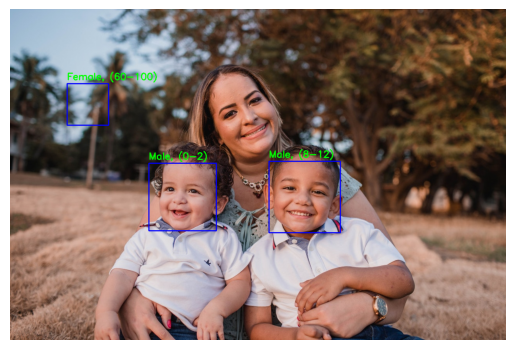

In [9]:
# Display image in Jupyter notebook
plt.imshow(frame_rgb)
plt.axis('off')  # Hide axis
plt.show()